In [25]:
import numpy as np
import pandas as pd
import plotly.express as px

In [26]:
file_path = 'Data/SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv'
df = pd.read_csv(file_path)

# Supply Chain Factors Format specifications

This was pulled from: https://github.com/USEPA/supply-chain-factors/blob/4b813e5a776fc14c7faffff98311e81ea7b69e6d/format-specs/README.md

Field Name | Definition
--- | ---
2017 NAICS Code | The [2017 North American Industry Classification Code](https://www.census.gov/naics/?58967?yearbck=2017) for the Factor
2017 NAICS Title | The [2017 North American Industry Classification Desciption](https://www.census.gov/naics/?58967?yearbck=2017) for the Factor
GHG | Greenhouse Gas name
Unit | A Metric System Unit
Supply Chain Emission Factors without Margins | Direct and indirect GHG emission intensity associated with production of commodity from cradle to the point of production
Margins of Supply Chain Emission Factors | Direct and indirect GHG emissions associated with production of   commodity from the point of production to the point of sale
Supply Chain Emission Factors with Margins | Direct and indirect GHG emissions associated with production of commodity from cradle to the point of sale
Reference USEEIO Code | Unique Code for [USEEIO v2.0](https://edg.epa.gov/metadata/catalog/search/resource/details.page?uuid=%7B487BC831-778F-461B-B74C-1A2CAE14CDD9%7D) commodity


In [27]:
sorted_df = df.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)
sorted_df.head(10)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
865,562212,Solid Waste Landfill,All GHGs,"kg CO2e/2021 USD, purchaser price",10.989,0.000,10.989,562212
285,327310,Cement Manufacturing,All GHGs,"kg CO2e/2021 USD, purchaser price",3.768,0.090,3.858,327310
31,112112,Cattle Feedlots,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0
30,112111,Beef Cattle Ranching and Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0
33,112130,Dual-Purpose Cattle Ranching and Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",3.227,0.071,3.298,1121A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
5,111160,Rice Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
6,111191,Oilseed and Grain Combination Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0


In [28]:
# Let's add a column that denotes which sector according to https://www.census.gov/naics/?58967?yearbck=2017
sectors_dict = {
    11: 'Agriculture, Forestry, Fishing and Hunting',
    21: 'Mining, Quarrying, and Oil and Gas Extraction',
    22: 'Utilities',
    23: 'Construction',
    31: 'Manufacturing',
    32: 'Manufacturing',
    33: 'Manufacturing',
    42: 'Wholesale Trade',
    44: 'Retail Trade',
    45: 'Retail Trade',
    48: 'Transportation and Warehousing',
    49: 'Transportation and Warehousing',
    51: 'Information',
    52: 'Finance and Insurance',
    53: 'Real Estate and Rental and Leasing',
    54: 'Professional, Scientific, and Technical Services',
    55: 'Management of Companies and Enterprises',
    56: 'Administrative and Support and Waste Management and Remediation Services',
    61: 'Educational Services',
    62: 'Health Care and Social Assistance',
    71: 'Arts, Entertainment, and Recreation',
    72: 'Accommodation and Food Services',
    81: 'Other Services (except Public Administration)',
    92: 'Public Administration'
}

def map_sector(code):
    first_two_digits = int(str(code)[:2])
    return sectors_dict.get(first_two_digits, 'Unknown')

# Add a new column based on the first two digits of '2017 NAICS Code'
df['Sector'] = df['2017 NAICS Code'].apply(lambda x: map_sector(x))

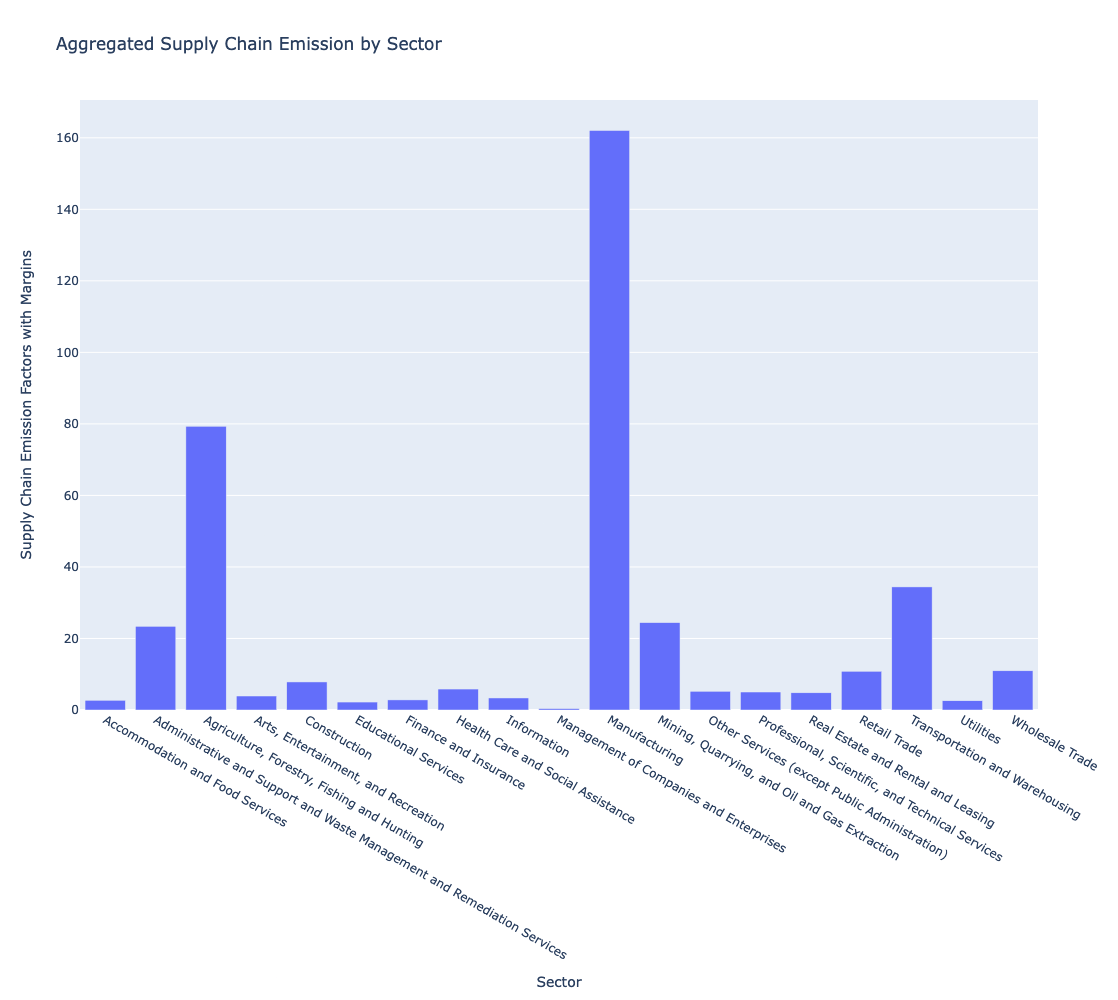

In [39]:
# Aggregate the values by sector (sum in this case)
aggregated_data = df.groupby('Sector')['Supply Chain Emission Factors with Margins'].sum().reset_index()

# Create Plotly plot
fig = px.bar(aggregated_data, x='Sector', y='Supply Chain Emission Factors with Margins', title='Aggregated Supply Chain Emission by Sector', height=1000, width=1100)
fig.show()

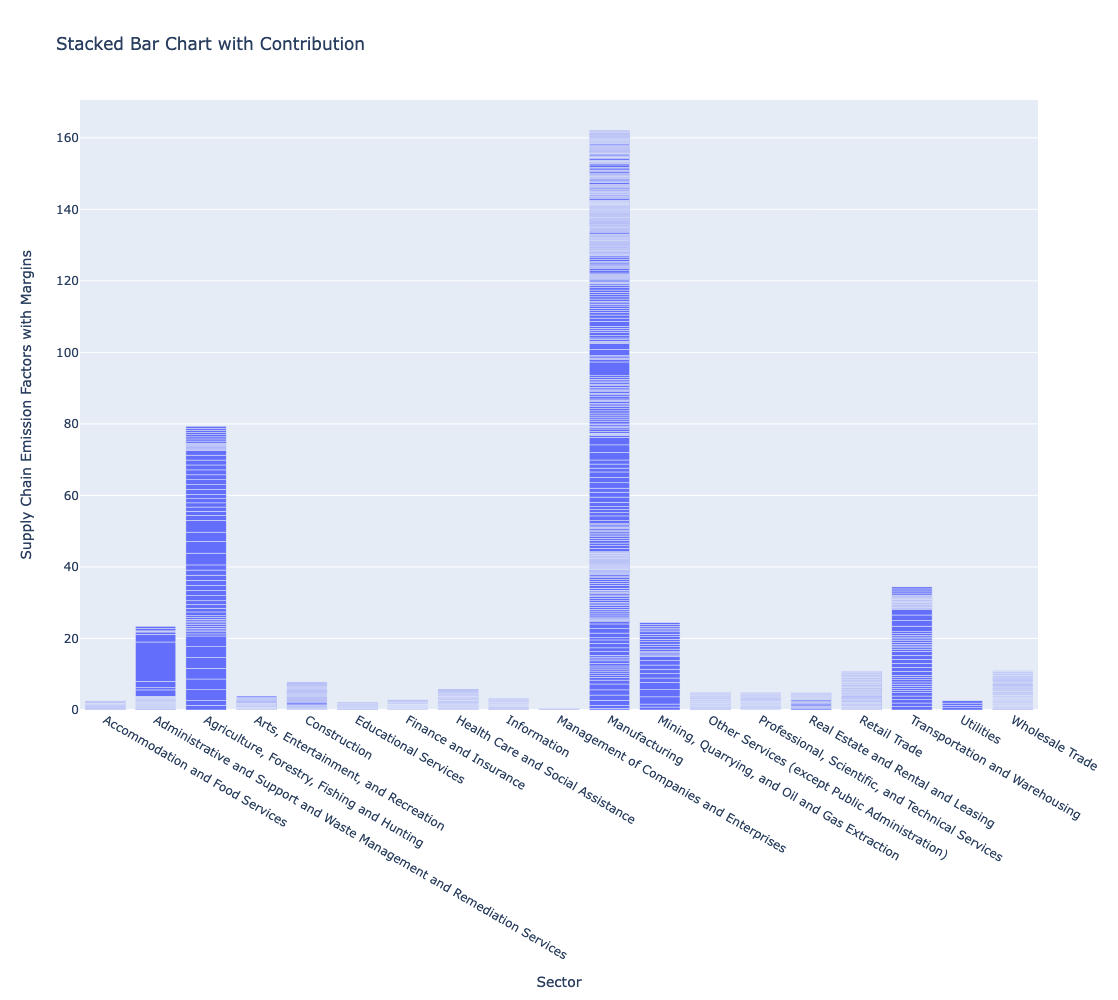

In [52]:
fig = px.bar(df, x='Sector', y='Supply Chain Emission Factors with Margins', title='Stacked Bar Chart with Contribution', 
             hover_data=['2017 NAICS Title'], height=1000, width=1100)
fig.update_traces(showlegend=False)
fig.update_xaxes(categoryorder="category ascending")
fig.show()